In [3]:
# Step 1: Set up the Environment
# Install required libraries if not already installed
!pip install scikit-learn pandas numpy

# Step 2: Load the Data
import pandas as pd

# Assuming you have the Titanic dataset file (train.csv) in the same directory as your notebook
data = pd.read_csv(r'C:\Users\Home\Downloads\train.csv')

# Step 3: Data Preprocessing
# Handle missing values
data = data.dropna(subset=['Age', 'Embarked'])  # Drop rows with missing age or embarked values
data = data.reset_index(drop=True)  # Reset the index after dropping rows

# Encode categorical variables
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1}).astype(int)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

# Split the data into features (X) and target variable (y)
X = data[['Pclass', 'Sex', 'Age', 'Embarked']]
y = data['Survived']

# Step 4: Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 5: Feature Importance Analysis
# Logistic regression provides coefficients as feature importance
feature_importance = model.coef_[0]
feature_names = ['Pclass', 'Sex', 'Age', 'Embarked']

# Print the importance of each feature
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance}")

# Step 6: Model Deployment
# Save the trained model
import joblib

joblib.dump(model, 'titanic_model.pkl')


Accuracy: 0.7902097902097902
Pclass: -1.2829371131719982
Sex: -2.469725716717246
Age: -0.030019623332285125
Embarked: 0.10235053308998313


['titanic_model.pkl']

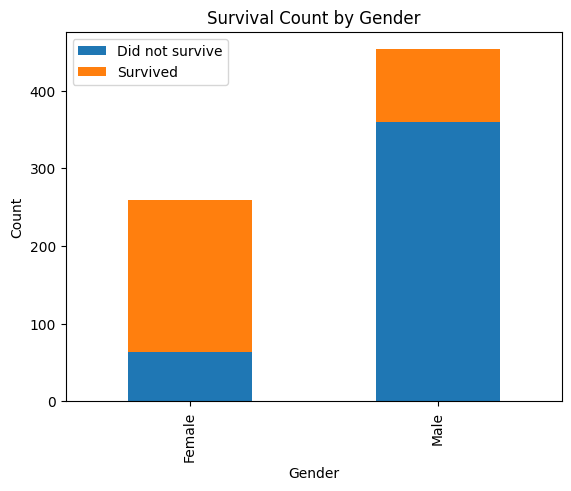

In [5]:
import matplotlib.pyplot as plt

# Replace the numeric values with labels
data['Sex'] = data['Sex'].map({0: 'Female', 1: 'Male'})

# Group the data by gender and survival status
survival_by_gender = data.groupby(['Sex', 'Survived']).size().unstack()

# Plot the bar plot
survival_by_gender.plot(kind='bar', stacked=True)

# Set the plot labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Count by Gender')

# Set the legend
plt.legend(['Did not survive', 'Survived'])

# Show the plot
plt.show()
